# Pythonで学ぶ制御工学 Part3

### 今日の目標
* 開ループ系の特性（安定余裕）をPythonでチェックできる
* 状態空間モデルを記述でき，状態フィードバック制御器を設計できる

In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

ゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数の計算

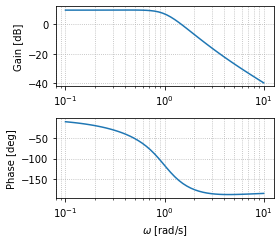

In [3]:
P = tf([1, 3],[1, 2, 2, 1])

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(P, logspace(-1,1), Plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
fig.tight_layout()

In [4]:
GM, PM, wpc, wgc = margin(P)
print('GM=', 20*np.log10(GM))
print('PM=', PM)
print('wpc=', wpc)
print('wgc=', wgc)

GM= 9.54242509439325
PM= 21.932276766366414
wpc= 2.23606797749979
wgc= 1.4718399190801255


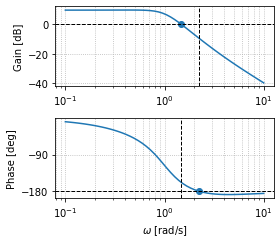

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 
    
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[1].set_yticks([-180, -90, 0])

ax[0].scatter(wgc, 0)
ax[0].axvline(wpc, ls='--', lw=1, c='k')
ax[0].axhline(0, ls='--', lw=1, c='k')

ax[1].scatter(wpc, -180)
ax[1].axvline(wgc, ls='--', lw=1, c='k')
ax[1].axhline(-180, ls='--', lw=1, c='k')

fig.tight_layout()
#fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

ナイキスト線図

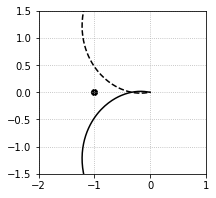

In [6]:
P = tf([1, 3],[1, 2, 2, 1])

fig, ax = plt.subplots(figsize=(3, 3))

x, y, _ = nyquist(P, logspace(-3,5,1000), Plot=False)
ax.plot(x, y, color='k')
ax.plot(x, -y, ls='--', color='k')
ax.scatter(-1, 0, color='k')
ax.set_xlim([-2, 1])
ax.set_ylim([-1.5, 1.5])
ax.grid(ls=':')

## PID制御器の周波数特性
### 並列表現

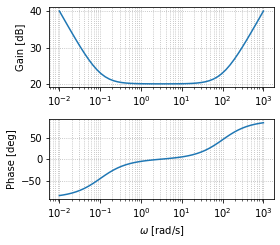

In [8]:
kp = 10
ki = 1
kd = 0.1
C = tf([kd, kp, ki], [1, 0])

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(C, logspace(-2,3), Plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
fig.tight_layout()
fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 直列表現

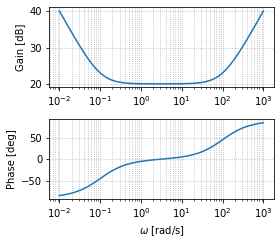

In [9]:
T1 = 0.01
T2 = 10
kp = 0.01
s = tf('s')
C = kp*(1+1/(T1*s))*(1+T2*s)

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(C, logspace(-2,3), Plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
fig.tight_layout()
fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 位相遅れ・進み補償の周波数特性

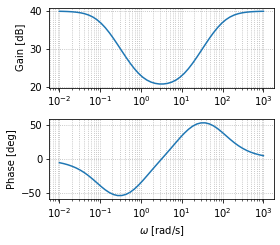

In [10]:
alpha = 10
T1 = 1
K1 = tf([alpha*T1, alpha], [alpha*T1, 1])

beta = 0.1
T2 = 0.1
K2 = tf([T2, 1],[beta*T2, 1])

k = 10

C = k * K1 * K2

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(C, logspace(-2,3), Plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
fig.tight_layout()
fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## ループ整形の例題

垂直駆動アームに対して，以下の仕様を満たす位相進み・遅れ補償を設計せよ

* ゲイン交差周波数を 40 rad/s
* 位相余裕を 60°
* 定常偏差を改善（定常偏差 0.02 以下）

In [11]:
g  = 9.81                # 重力加速度[m/s^2]
l  = 0.2                 # アームの長さ[m]
M  = 0.5                 # アームの質量[kg]
mu = 1.5e-2              # 粘性摩擦係数
J  = 1.0e-2              # 慣性モーメント

P = tf( [0,1], [J, mu, M*g*l] )

ref = 30 # 目標角度 [deg]

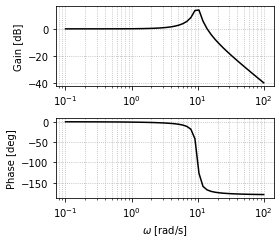

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(P, logspace(-1,2), Plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain), color='k')
ax[1].semilogx(w, phase*180/np.pi, color='k')
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')

fig.tight_layout()
#fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

制御対象のボード線図． 低周波ゲインが０[dB]なので，このままフィードバック系を構築しても定常偏差が残る．

### 位相遅れ補償の設計

定常偏差を小さくするために，位相遅れ補償から設計する

低周波ゲインを上げるために，$\alpha=20$ とする．
そして，ゲインを上げる周波数は，$T_1$ で決めるが，
最終的なゲイン交差周波数（ゲイン交差周波数の設計値）の１０分の１程度を$1/T_1$
にするために，$T_1=0.25$ とする（$1/T_1=40/10=4$）．

K1= 
5 s + 20
--------
5 s + 1

-----------------------
phase at 40rad/s = 176.8635987273622


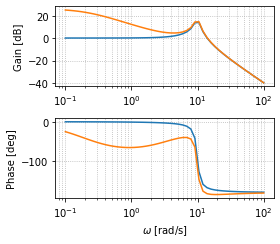

In [13]:
alpha = 20
T1 = 0.25
K1 = tf([alpha*T1, alpha], [alpha*T1, 1])
print('K1=', K1)

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 
H1 = P*K1
gain, phase, w = bode(P, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

gain, phase, w = bode(H1, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
fig.tight_layout()

[[[mag]]], [[[phase]]], omega = freqresp(H1, [40])
phaseH1at40 = phase * (180/np.pi)
print('-----------------------')
print('phase at 40rad/s =', phaseH1at40)

#fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

最終的にゲイン補償によって，ゲイン交差周波数を設計値の40[rad/s]まで上げるが，あげてしまうと，位相余裕が60[dB]を下回る．実際， 40[rad/s]における位相は -176[deg]なので，位相余裕は 4[deg]程度になってしまう．したがって，40[rad/s]での位相を -120[deg] まであげておく．

### 位相進み補償の設計

40[rad/s]において位相を進ませる量は　60 - (180-176) = 56[deg]程度とする．

K2= 
 0.1047 s + 1
--------------
0.005971 s + 1

-----------------------
gain at 40rad/s = -11.058061395752677
phase at 40rad/s = -119.99999999999997


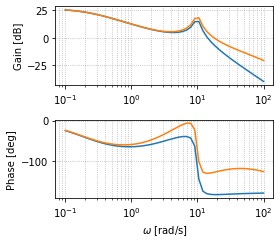

In [14]:
phim = (60- (180 + phaseH1at40 ) ) * np.pi/180
beta = (1-np.sin(phim))/(1+np.sin(phim))
T2 = 1/40/np.sqrt(beta)
K2 = tf([T2, 1],[beta*T2, 1])
print('K2=', K2)

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(H1, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)

H2 = P*K1*K2
gain, phase, w = bode(H2, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain))
ax[1].semilogx(w, phase*180/np.pi)
ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')

fig.tight_layout()

[[[mag]]], [[[phase]]], omega = freqresp(H2, [40])
magH2at40 = mag
phaseH2at40 = phase * (180/np.pi)
print('-----------------------')
print('gain at 40rad/s =', 20*np.log10(magH2at40))
print('phase at 40rad/s =', phaseH2at40)

#fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

位相進み補償により，40[rad/s]での位相が -120[deg]となっている． あとは，ゲイン補償により，40[rad/s]のゲインを 0[dB] にすればよい．

### ゲイン補償の設計

40[rad/s] におけるゲインが0[dB]となるようにk=1/magH2at40
 をゲイン補償とする． これにより，40[rad/s]がゲイン交差周波数になり，位相余裕もPM=60[deg]となる．

k= 3.571931073029087
-----------------
(GM, PM, wpc, wgc)
(inf, 60.00000000000003, nan, 40.000000000000014)


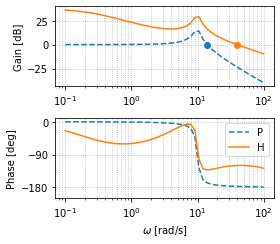

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

k = 1/magH2at40
print('k=', k)

gain, phase, w = bode(P, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain), ls='--', label='P')
ax[1].semilogx(w, phase*180/np.pi, ls='--', label='P')

H = P*k*K1*K2
gain, phase, w = bode(H, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain), label='H')
ax[1].semilogx(w, phase*180/np.pi, label='H')

gm, pm, wcp, wgc = margin(P)
ax[0].scatter(wgc,0)

gm, pm, wpc, wgc = margin(H)
ax[0].scatter(wgc,0)

ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[1].set_ylim(-210,10)
ax[1].set_yticks([-180,-90,0])
ax[1].legend()
fig.tight_layout()

print('-----------------')
print('(GM, PM, wpc, wgc)')
print(margin(H))

fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 閉ループ系の応答

error= 0.49520444220090865
------------------
error= 0.013546052578222278
------------------


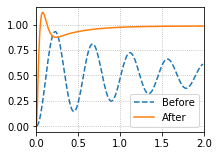

In [17]:
fig, ax = plt.subplots(figsize=(3, 2.3))

Gyr_P = feedback(P, 1)
y, t = step(Gyr_P, np.arange(0,2,0.01))
pltargs = {'ls': '--', 'label': 'Before'}
ax.plot(t, y, **pltargs)
    
e_std = 1 - dcgain(Gyr_P)
print('error=', e_std)    
print('------------------')

Gyr_H = feedback(H, 1)
y, t = step(Gyr_H, np.arange(0,2,0.01))

ax.plot(t,y, label='After')

e_std = 1 - dcgain(Gyr_H)
print('error=', e_std)    
print('------------------')

ax.set_xlim(0,2)
ax.grid(ls=':')
ax.legend()

fig.savefig("test.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [18]:
stepinfo(Gyr_H)

{'RiseTime': 0.031341050098324,
 'SettlingTime': 0.8486192026623113,
 'SettlingMin': 0.8748763490545179,
 'SettlingMax': 1.1217616048803796,
 'Overshoot': 13.741171664614088,
 'Undershoot': 0.0,
 'Peak': 1.1217616048803796,
 'PeakTime': 0.07473635023446491,
 'SteadyStateValue': 0.9862405920945597}

直流ゲイン = -5.937689510770942
------------------
直流ゲイン = -0.11846369931437545
------------------


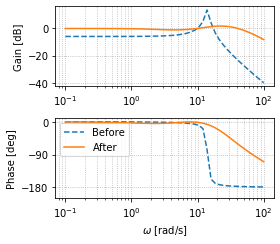

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(Gyr_P, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
ax[1].semilogx(w, phase*180/np.pi, **pltargs)

print('直流ゲイン =', 20*np.log10(Gyr_P.dcgain()))    
print('------------------')

gain, phase, w = bode(Gyr_H, logspace(-1,2), Plot=False)
ax[0].semilogx(w, 20*np.log10(gain), label='After')
ax[1].semilogx(w, phase*180/np.pi, label='After')

print('直流ゲイン =', 20*np.log10(Gyr_H.dcgain()))    
print('------------------')

ax[0].grid(which="both", ls=':')
ax[0].set_ylabel('Gain [dB]')
ax[1].grid(which="both", ls=':')
ax[1].set_xlabel('$\omega$ [rad/s]')
ax[1].set_ylabel('Phase [deg]')
ax[1].set_ylim(-210,10)
ax[1].set_yticks([-180,-90,0])
ax[1].legend()

fig.tight_layout()
#fig.savefig("loop_leadlag_fbbode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## 状態空間モデルに基づく設計

### 状態空間モデルの時間応答

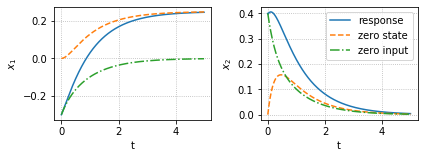

In [20]:
A = [[0, 1],[-4, -5]]
B = [[0], [1]]
C = np.eye(2)
D = np.zeros([2, 1])
P = ss(A, B, C, D)

Td = np.arange(0, 5, 0.01)
Ud = 1*(Td>0) #ステップ入力
X0 = [-0.3, 0.4]

xst, t = step(P, Td) #ゼロ状態応答（ステップ入力）
xin, _ = initial(P, Td, X0) #ゼロ入力応答
x, _, _ = lsim(P, Ud, Td, X0) 

fig, ax = plt.subplots(1, 2, figsize=(6, 2.3)) 
for i in [0, 1]:
    ax[i].plot(t, x[:,i], label='response')
    ax[i].plot(t, xst[:,i], ls='--', label='zero state')
    ax[i].plot(t, xin[:,i], ls='-.', label='zero input')
    ax[i].grid(ls=':')

ax[0].set_xlabel('t')
ax[0].set_ylabel('$x_1$')
ax[1].set_xlabel('t')
ax[1].set_ylabel('$x_2$')
ax[1].legend()

fig.tight_layout()

ゼロ状態応答とゼロ入力応答を足すと，完全応答になる

### 可制御性，可観測性

In [21]:
A = [[0, 1], [-4, 5]]
B = [[0], [1]]
C = [1, 0]
D = [0]
P = ss(A, B, C, D)
print(P)

A = [[ 0.  1.]
 [-4.  5.]]

B = [[0.]
 [1.]]

C = [[1. 0.]]

D = [[0.]]



In [22]:
Uc = ctrb(P.A, P.B)
print('Uc=\n',Uc)
print('det(Uc)=', np.linalg.det(Uc))
print('rank(Uc)=', np.linalg.matrix_rank(Uc))

Uc=
 [[0. 1.]
 [1. 5.]]
det(Uc)= -1.0
rank(Uc)= 2


Ucがフルランク（正則）であるので，(A,B)は可制御

In [23]:
Uo = obsv(P.A, P.C)
print('Uo=\n', Uo)
print('det(Uo)=', np.linalg.det(Uo))
print('rank(Uo)=', np.linalg.matrix_rank(Uo))

Uo=
 [[1. 0.]
 [0. 1.]]
det(Uo)= 1.0
rank(Uo)= 2


Uoがフルランク（正則）であるので，(A,C)は可観測

### 状態フィードバック

In [24]:
A = [[0, 1], [-4, 5]]
B = [[0], [1]]
C = np.eye(2)
D = np.zeros((2,1))
P = ss(A, B, C, D)
print(P.pole())

[1. 4.]


極配置による設計

In [25]:
Pole = [-1, -1]
F = -acker(P.A, P.B, Pole)
print('F=',F)
print(np.linalg.eigvals(P.A+P.B*F))

F= [[ 3. -7.]]
[-1. -1.]


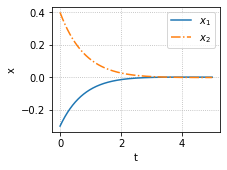

In [26]:
Acl = P.A + P.B*F
Pfb = ss(Acl, P.B, P.C, P.D)

Td = np.arange(0, 5, 0.01)
X0 = [-0.3, 0.4]
x, t = initial(Pfb, Td, X0) #ゼロ入力応答

fig, ax = plt.subplots(figsize=(3, 2.3))
ax.plot(t, x[:,0], label = '$x_1$')
ax.plot(t, x[:,1], ls = '-.', label = '$x_2$')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.legend()
ax.grid(ls=':')

最適レギュレータ

In [27]:
Q = [ [100, 0], [0, 1]]
R = 1

F, _, _ = lqr(P.A, P.B, Q, R)
F = -F

print('--- フィードバックゲイン ---')
print(F)
print('--- 閉ループ極 ---')
print(np.linalg.eigvals(P.A+P.B*F))

--- フィードバックゲイン ---
[[ -6.77032961 -11.28813639]]
--- 閉ループ極 ---
[-3.14406819+0.94083198j -3.14406819-0.94083198j]


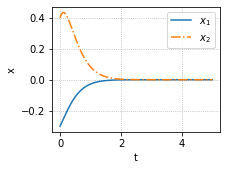

In [28]:
Acl = P.A + P.B*F
Pfb = ss(Acl, P.B, P.C, P.D)

tdata = np.arange(0, 5, 0.01)
xini, tini = initial(Pfb, tdata, [-0.3, 0.4]) #ゼロ入力応答

fig, ax = plt.subplots(figsize=(3, 2.3))

ax.plot(tini, xini[:,0], label = '$x_1$')
ax.plot(tini, xini[:,1], ls = '-.', label = '$x_2$')

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.legend()
ax.grid(ls=':')